In [94]:
%matplotlib inline
from __future__ import print_function

# Module 3: Statistics and machine learning in Python

## Survey of statistical packages in Python
While Python likely lags behind R in terms of statistical packages offered, a few packages have emerged as top ones for data analysis/exploration.  We'll be focused on two for this module.

## Statsmodels vs Scikit-learn
Josef Perktold (maintainer of `statsmodels`) on [cross-validated](https://stats.stackexchange.com/questions/47913/pandas-statsmodel-scikit-learn) when asked about the difference between statistical packages in Python:
* statsmodels ("traditional" statistics and econometrics, with much stronger emphasis on parameter estimation and (statistical) testing)
* scikit-learn (machine learning with emphasis on predictive modeling with often large and sparse data)



## What about scipy (sigh-pie)?
* Essential component of the Python statistics "ecosystem"
* Both `statsmodels` and `scikit-learn` require `scipy` as a dependency
* `scipy.stats` has distributions, common statistical tests, and descriptive statistics
* In other words, if it's not in `statsmodel` or `scikit-learn`, it's probably in `scipy`

## Roadmap for this module
* Using iris data, show how to do simple linear regression using both packages
* Extend this to multiple linear regression (showcasing dummy variable support)
* Demonstrate machine-learning algorithms (e.g. random forests) in `scikit-learn`
* Cross-validation support
* Sample graphics output

## Simple linear regression (statsmodels)
* Has very similar syntax to R, using formula specification
* Tightly integrated with `pandas`.

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
iris_df = pd.read_csv('iris.csv')

# ols (ordinary least squares) model specification
# Notice the similarity to the R syntax
model = smf.ols(formula='petal_width ~ petal_length', data=iris_df)

# Fit the results
results_sm = model.fit()

# Print the summary of the model
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           5.78e-86
Time:                        17:40:20   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3665      0.040     -9.188   

We can also just extract the coefficients (params), confidence intervals, and model predicted values

In [3]:
# Get just the parameters of the model - returned as pandas series
print(results_sm.params)

# Confidence interval - returned as pandas DataFrame
print('-' * 50)
print(results_sm.conf_int())

# Predicted values - returned as numpy array
print('-' * 50)
print(results_sm.predict()[:10])

Intercept      -0.366514
petal_length    0.416419
dtype: float64
--------------------------------------------------
                     0         1
Intercept    -0.445340 -0.287688
petal_length  0.397424  0.435415
--------------------------------------------------
[0.21647274 0.21647274 0.17483083 0.25811465 0.21647274 0.34139848
 0.21647274 0.25811465 0.21647274 0.25811465]


## Simple linear regression (scikit-learn)
* Inputs are typically numpy arrays rather than pandas DataFrames
* No formula specification for models
* Model output not as friendly
* More generic API to fit larger class of statistical techniques

In [4]:
import numpy as np
from sklearn import linear_model

# Create our LinearRegression object
model = linear_model.LinearRegression()

# X inputs to model must be 2-D numpy array
# We need to "reshape" our petal_length array
X = iris_df[['petal_length']]
y = iris_df['petal_width']

# Fit the model
results_sk = model.fit(X=X, y=y)

# Get the model coefficients
print(results_sk.intercept_, results_sk.coef_)

# Get the model R^2
print('-' * 50)
print(results_sk.score(X, y))

# Get the predicted values
print('-' * 50)
print(results_sk.predict(X)[:10])

-0.36651404521673014 [0.41641913]
--------------------------------------------------
0.9269012279220036
--------------------------------------------------
[0.21647274 0.21647274 0.17483083 0.25811465 0.21647274 0.34139848
 0.21647274 0.25811465 0.21647274 0.25811465]


We can also verify that our coefficients match between `statsmodels` and `scikit-learn` results.

In [5]:
# Verify that model coefficients match between statsmodels and 
print(results_sm.params[0], results_sm.params[1])
print(results_sk.intercept_, results_sk.coef_[0])

-0.3665140452167292 0.41641913228540156
-0.36651404521673014 0.41641913228540184


## Multiple linear regression (statsmodels)
We can fit a model using multiple X variables.  Here's an example of using the other continuous variables in the iris dataset.

In [6]:
# Specify the formula as a string
formula = 'petal_width ~ petal_length + sepal_length + sepal_width'
model = smf.ols(formula=formula, data=iris_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           6.20e-88
Time:                        17:40:21   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2487      0.178     -1.396   

## Multiple linear regression with dummy variables (statsmodels)
We can also use categorical variables in our model, which get translated into multiple dummy (0|1) fields.  `statsmodels` makes this quite easy by searching the data frame for "factor-like" data.  In our case, the `species` field qualifies as such.

In [7]:
# Show the data values of the species field in iris_df
print(iris_df.species.unique())

# OLS model with all variables
# Categorical variables automatically get set as dummy variables
model = smf.ols(
    formula='petal_width ~ sepal_length + sepal_width + petal_length + species',
    data=iris_df).fit()
print('-' * 50)
print(model.summary())

['setosa' 'versicolor' 'virginica']
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     599.5
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           1.79e-94
Time:                        17:40:21   Log-Likelihood:                 59.398
No. Observations:                 150   AIC:                            -106.8
Df Residuals:                     144   BIC:                            -88.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Multiple linear regression with dummy variables (scikit-learn)
The process for transforming categorical variables into dummy variables is a bit more convoluted with `scikit-learn`.  One way to do this transformation is to rely on pandas `get_dummies` function.

In [8]:
# Find dummy variables within iris_df predictor variables
# Note that only two of the three species categories are encoded
iris_dummy_df = pd.get_dummies(
    iris_df[['sepal_length', 'sepal_width', 'petal_length', 'species']],
    drop_first=True
)
print(iris_dummy_df.head())

   sepal_length  sepal_width  petal_length  species_versicolor  \
0           5.1          3.5           1.4                   0   
1           4.9          3.0           1.4                   0   
2           4.7          3.2           1.3                   0   
3           4.6          3.1           1.5                   0   
4           5.0          3.6           1.4                   0   

   species_virginica  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


Once we have the dummy variables in a new DataFrame, we can run the regression

In [9]:
lr = linear_model.LinearRegression()
predicted = lr.fit(X=iris_dummy_df, y=iris_df['petal_width'])
print(predicted.coef_, predicted.intercept_)

[-0.09475934  0.24967968  0.2409481   0.65822773  1.05777122] -0.4877879450109994


Again, the output from `scikit-learn` isn't easily digestable, so we can attach names to coefficients for nicer formatting.

In [10]:
# Stack the intercept and coefficients into a numpy array
values = np.append(predicted.intercept_, predicted.coef_)

# Do the same with column names - getting them from pandas
names = np.append('intercept', iris_dummy_df.columns)

# Stitch them together into a pandas DataFrame
results = pd.DataFrame(values, index = names, columns=['coef'])
print(results)

                        coef
intercept          -0.487788
sepal_length       -0.094759
sepal_width         0.249680
petal_length        0.240948
species_versicolor  0.658228
species_virginica   1.057771


## Machine-learning algorithms in `scikit-learn`
There are many algorithms in `scikit-learn` for classification, regression, and clustering.  Here we focus on a Random Forest classifier to predict iris species from the continuous variables in the dataset.

Import the class from scikit-learn:

In [11]:
from sklearn.ensemble import RandomForestClassifier

Set the X columns (continuous variables), Y column (species) and assert similar number of rows

In [12]:
x_vars = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
X = np.array(iris_df[x_vars])
Y = np.array(iris_df['species'])
print(X.shape, Y.shape)

(150, 4) (150,)


Now we set up the random forest classifier using 500 trees and have the model calculate an out-of-bag score

In [13]:
clf_rf = RandomForestClassifier(n_estimators=500, n_jobs=1, oob_score=True)
clf_rf_fit = clf_rf.fit(X, Y)
print('Training set accuracy:')
print(clf_rf.score(X, Y))
print('-' * 50)
print('Out-of-bag set accuracy')
print(clf_rf_fit.oob_score_)

Training set accuracy:
1.0
--------------------------------------------------
Out-of-bag set accuracy
0.9533333333333334


## Cross-validation support (train-test split)
`scikit-learn` has extensive cross-validation support to avoid overfitting models.  One way to do this is to initially split data into training and test datasets using the `train_test_split` functionality.  A certain proportion of the data can be held out for final testing.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

# Load iris data
iris = datasets.load_iris()

# Show the sizes of the X and y arrays
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [17]:
# Create training and testing datasets using 40% of the
# data for testing
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

# Show the sizes of these arrays
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Fit a random forest classifier using the training data
rf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

# Show the accuracy score associated with the training data
print('Training set accuracy:', rf.score(X_train, y_train))

# Show the accuracy score associated with the completely held-out data
print('Testing set accuracy:', rf.score(X_test, y_test))

(90, 4) (90,)
(60, 4) (60,)
Training set accuracy: 1.0
Testing set accuracy: 0.9333333333333333


## Cross-validation support (cont.)

One more twist on this is that you can also do cross-validation using the training data set (e.g. k-fold cross validation).  In this mode, each training plot is used in both training and testing.  The function `cross_val_score` wraps around the classification object and creates all the folds for you.  For example:

In [16]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=500)

# Fit the model with *all* training data
train_fit = rf.fit(X_train, y_train)
print('Training set accuracy:', train_fit.score(X_train, y_train))

# Run 5-fold cross-validation with the training data
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)

# Finally, show accuracy of held-out data
print('Testing set accuracy:', train_fit.score(X_test, y_test))

Training set accuracy: 1.0
Cross-validation scores: [1.         1.         0.94444444 0.88888889 0.9375    ]
Testing set accuracy: 0.9333333333333333


## Exercises

### Exercise 1: Use statsmodels for regression

I've downloaded (and slightly cleaned) a dataset on 1970's automobile miles-per-gallon.  (Data downloaded from http://archive.ics.uci.edu/ml/datasets/Auto+MPG).  We'll practice using `statsmodels` regression tools to create three different regressions:
* simple linear regression 
* multiple linear regression
* multiple linear regression with dummy variables

First, bring in the dataset called `auto_mpg.csv` using pandas and name your DataFrame `auto_mpg_df`.  Use the `pandas.Dataframe.info` method to see a description of these data.

In [41]:
auto_mpg_df = pd.read_csv('auto_mpg.csv')
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(5)
memory usage: 24.5 KB


Before we start our modeling, let's first look at patterns in the data for our dependent variable `mpg`.  From our pandas lesson, we used the `seaborn` graphics package to look at a pair plot of all variables against one variable.  We'll first need to import the `seaborn` package (usually aliased to `sns`) and then use its `pairplot` function.

You'll need to supply three variables to the `pairplot` function:
* a pandas DataFrame
* a list of x variables
* a list of y variables

See if you can figure out the syntax, but look at the solution if you need help.

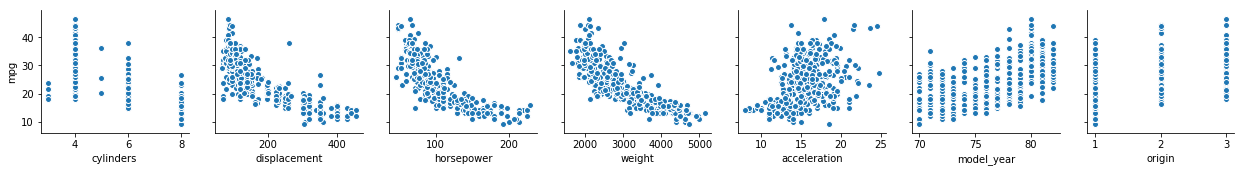

In [45]:
import seaborn as sns

# Get list of all variables excluding the mpg column
x_vars = list(auto_mpg_df.columns)
x_vars.remove('mpg')

# Draw the pairplot of mpg against all x variables
g = sns.pairplot(auto_mpg_df,
    x_vars=x_vars,
    y_vars=['mpg'],
    kind='scatter'
)

We can see there is an inverse relationship of `mpg` with `displacement`, `horsepower` and `weight` and slight positive relationships of `mpg` with `acceleration` and `model_year`.  `weight` looks like a decent variable to create a simple regression.  Create a `statsmodels` model that finds the linear relationship using `mpg` as the dependent variable and `weight` as the independent variable.  You'll need to do the following:
* specify the formula as a string
* call the `ols` function from `statsmodels.formula.api` (`statsmodels.formula.api` should already be aliased to `smf`).  This function takes a formula and a pandas DataFrame as arguments.  Assign this to a variable called `model`.
* call `fit` on your created `model`.  `fit` takes no arguments.  Assign the output of this to a variable called `results`.
* print out the `results`'s summary with the `summary` method.  `summary` takes no arguments.

In [50]:
# Specify the formula as a string
formula = 'mpg ~ weight'

# Set up the simple linear regression model
model = smf.ols(formula=formula, data=auto_mpg_df)

# Get model fit results
results = model.fit()

# Print out the results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 08 Apr 2018   Prob (F-statistic):          6.02e-102
Time:                        10:26:26   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

We can visualize the model fit using graphics functionality in `statsmodels`.  Evaluate the below cell which gives a set of four plots.  The top-left figure shows observed and predicted `mpg` values as a function of `weight` and the top-right figure shows model residuals.

In [ ]:
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the results as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(results, 'weight', fig=fig)

Now let's move on to a multiple linear regression model using `weight` and `acceleration`.  This shouldn't be very different from the simple linear regression - you'll just need to change the formula string.  Use the same output names as you did before.

In [84]:
formula = 'mpg ~ weight + acceleration'
model = smf.ols(formula=formula, data=auto_mpg_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     453.2
Date:                Sun, 08 Apr 2018   Prob (F-statistic):          2.43e-102
Time:                        10:58:24   Log-Likelihood:                -1125.4
No. Observations:                 392   AIC:                             2257.
Df Residuals:                     389   BIC:                             2269.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.0953      1.868     21.999   

Again, let's take a graphical look at the regression output.  This shows us results with `weight` on the X-axis.  Run the cell below and then change the variable to `acceleration` and run it again to see its output.  

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, 'weight', fig=fig)

As a last step, let's get practice using a dummy variable in model specification.  The `origin` column in the dataset is really a categorical column of the car's continent (1=North America, 2=Europe, 3=Asia).  Let's first create a new variable in our `auto_mpg_df` DataFrame called `continent`.  Evaluate the cell below which creates a new column that remaps origin codes to continents. 

In [86]:
d = {
    1: 'North America',
    2: 'Europe',
    3: 'Asia'
}
def remap(x):
    return d[x]
    
auto_mpg_df['continent'] = auto_mpg_df['origin'].apply(remap)

Now we can specify the continent as an additional modeling variable.  Go ahead and specify this model and this time use names `model_dummy` and `results_dummy` to capture the model output.  Print out the summary of this model.

In [87]:
formula = 'mpg ~ weight + acceleration + continent'
model_dummy = smf.ols(formula=formula, data=auto_mpg_df)
results_dummy = model_dummy.fit()
print(results_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 08 Apr 2018   Prob (F-statistic):          1.24e-102
Time:                        10:59:40   Log-Likelihood:                -1118.5
No. Observations:                 392   AIC:                             2247.
Df Residuals:                     387   BIC:                             2267.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Show the improvement in adjusted R-squared between the two multiple linear regression results (`results` vs `results_dummy`).  The attribute called `rsquared_adj` holds this information.

In [96]:
# Difference in adj. R-squared between model with continents
# and base MLR model
improvement = results_dummy.rsquared_adj - results.rsquared_adj

print('R-square improvement:', improvement)

R-square improvement: 0.008921184952909056


Clearly, there was not much improvement by adding in `continent` as a predictor variable.

### Exercise 2: Create a random forest model to predict forest series from spatial variables
We're going to work with forest inventory data for this next exercise.  The USFS Region 6 Ecology Team collects "ecoplot" data across Washington and Oregon which characterize species by percent cover.  From here, ecologists have characterized each plot into a forest series call.

At each plot location, we've extracted a number of environmental variables that could be used to predictively map forest series.  Our dependent variable will be forest series and we will use 10 environmental variables as our independent set.  We will run a simple random forest model with 500 trees and assess our accuracy for cross-validated training data and a 20% set of testing data.

First, read the ecoplot data (`'ecoplots.csv'`) into a pandas DataFrame called `ecoplots_df`.  Use the `pandas.Dataframe.info` method to see a description of these data.

In [30]:
# Read in the ecoplot data
ecoplots_df = pd.read_csv('ecoplots.csv')

# Print out column information and record lengths
print(ecoplots_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 14 columns):
FCID      1486 non-null int64
LON       1486 non-null float64
LAT       1486 non-null float64
B3        1486 non-null float64
B4        1486 non-null float64
B5        1486 non-null float64
ASPTR     1486 non-null float64
DEM       1486 non-null float64
TPI450    1486 non-null float64
ANNPRE    1486 non-null float64
SLPPCT    1486 non-null float64
SMRTMP    1486 non-null float64
SMRVP     1486 non-null float64
SERIES    1486 non-null int64
dtypes: float64(12), int64(2)
memory usage: 162.6 KB
None


I've set the x variables that we'll use below.  Because we're using `scikit-learn (sklearn)`, we'll need to convert our data into numpy arrays.  Make sure you understand what's happening here.  For `X`, we're first extracting multiple columns from our DataFrame and then converting this into a 2-D numpy array. For `Y`, we're extracting a single column (a pandas Series) and then converting to a 1-D array.  You can see this with the shape (or dimensions) of the array.

In [31]:
# Set which environmental variables to use as predictors - all but FCID
x_vars = ['LON', 'LAT', 'B3', 'B4', 'B5', 'ASPTR', 'DEM', 'TPI450', 'ANNPRE', 'SLPPCT']

# Convert to 2-D numpy array
X = np.array(ecoplots_df[x_vars])

# Convert to 1-D numpy array
Y = np.array(ecoplots_df['SERIES'])

# Print the shape of both arrays
print(X.shape, Y.shape)

(1486, 10) (1486,)


Now we're ready to separate our data into training and testing datasets.  Refer to the overview section to get the syntax for creating these datasets.  Use a 20% holdout for `test_size` and call your output arrays `X_train`, `X_test`, `Y_train`, and `Y_test`.  In addition, print out the sizes of these arrays using the `shape` method for numpy arrays.

In [34]:
# Create training and testing datasets using 20% of the
# data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Show the sizes of these arrays
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1188, 10) (1188,)
(298, 10) (298,)


At this point, we need to build our random forest model.  We just need to create the random forest object without yet fitting it with any data.  Create a `RandomForestClassifier` object using 500 trees and call it `rf`.  We don't need to calculate the oob_score.

In [33]:
rf = RandomForestClassifier(n_estimators=500)

We're now ready for creating a cross-validation on the training (`X_train`, `Y_train`) data.  Import the `cross_val_score` function from `sklearn.model_selection` module (look at overview for inspiration).

In [35]:
from sklearn.model_selection import cross_val_score

We will run a 10-fold cross-validation of the training data.  We will collect the scores (the proportion of correctly predicted series based on observed values) from each cross-validation run.  We will use the `cross_val_score` function to peform this.  Use your methods for getting help (web, Jupyter shortcuts, etc.) to figure out how to call this function.  You will need to provide these arguments: `estimator`, `X`, `y` and `cv`.  Once you've figured this out, print out the cross validation scores.  (Note: this will take some time - 30 to 40 seconds?)

In [37]:
# Run 10-fold cross-validation with the training data
scores = cross_val_score(rf, X_train, Y_train, cv=10)
print('Cross-validation scores:', scores)

Cross-validation scores: [0.728      0.832      0.80645161 0.78861789 0.84033613 0.80508475
 0.73913043 0.79130435 0.75       0.8125    ]


Now you have some idea how well the model is performing with the cross-validation.  Let's see if these results hold with the testing (`X_test`, `Y_test`) data.  You'll first need to fit the model using *all* training data using the `rf` object's `fit` method and then get the score of the testing data using the `rf` object's `score` method.  Print out the testing set score.

In [38]:
# Fit the random forest classifier using all training data
rf.fit(X_train, Y_train)

# Show the accuracy score associated with the completely held-out data
print('Testing set accuracy:', rf.score(X_test, Y_test))

Testing set accuracy: 0.8489932885906041


One last step - because we're predicting a single categorical (class) variable, we can use a confusion matrix to see the distribution of observed and predicted `SERIES` calls.  Import `confusion_matrix` from `sklearn.metrics` and use this function to show the confusion matrix for the testing data.  The function takes two required parameters, `y_true` and `y_pred`.  `y_true` will come directly from `Y_test`.  See if you can figure out how to get the `y_pred` values.  **Hint**: you'll need to use the `rf` object's `predict` method.

The rows here are observed classes and the columns are predicted classes.

In [39]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Observed values come directly from the Y_test array
y_true = Y_test

# Predicted values come from using model predictions using the X_test array
y_pred = rf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_true, y_pred))

[[ 6  0  0  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 11  2  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  5  0  3 10  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]
